In [3]:
import numpy as np

seed_ = 20200218

np.random.seed(seed_)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

sns.set_style('whitegrid')
color_palette = sns.color_palette("muted")
sns.set_palette(color_palette)

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


def create_fig(figsize=(8,5), dpi=150):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    return fig

## Solo FPP Mode

In [4]:
df = pd.read_csv('./data/solofpp_train_clean.csv')
df.shape

(536723, 30)

In [5]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,headshotRate,totalDistance,itemUsed,winPlacePerc
0,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,45,0,...,0.00,0,0,49.75,2,0,0.00,49.75,0,0.1875
1,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,48,1000,...,0.00,0,0,1089.00,6,1500,0.00,3093.00,0,0.7368
2,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200,1,5,5,986,...,76.84,0,0,2050.00,6,1462,0.25,3354.84,6,0.8750
3,92022479b92ce7,2f2c33f548c4b9,07948d723b9c0f,0,3,254.300,0,12,13,0,...,15.29,0,0,1787.00,3,0,0.00,4169.29,15,0.8211
4,47143f942503e0,e17a8867a393ec,bc2faecb77e5ec,0,0,136.900,0,0,37,0,...,0.00,0,0,270.70,1,0,0.00,270.70,0,0.3474


## drop column

ดรอปส่วนที่ไม่เกี่ยวกับ Solo

In [6]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'rideDistance', 'roadKills', 'swimDistance',
       'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPoints', 'headshotRate', 'totalDistance', 'itemUsed',
       'winPlacePerc'],
      dtype='object')

In [7]:
df.drop(labels=['groupId', 'matchType'], axis=1, inplace=True)
df.head()

,Id,matchId,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,headshotRate,totalDistance,itemUsed,winPlacePerc
0,315c96c26c9aac,6dc8ff871e21e6,0,0,100.000,0,0,45,0,1,...,0.00,0,0,49.75,2,0,0.00,49.75,0,0.1875
1,311b84c6ff4390,292611730ca862,0,0,8.538,0,0,48,1000,0,...,0.00,0,0,1089.00,6,1500,0.00,3093.00,0,0.7368
2,b7807186e3f679,2c30ddf481c52d,0,1,324.200,1,5,5,986,4,...,76.84,0,0,2050.00,6,1462,0.25,3354.84,6,0.8750
3,92022479b92ce7,07948d723b9c0f,0,3,254.300,0,12,13,0,2,...,15.29,0,0,1787.00,3,0,0.00,4169.29,15,0.8211
4,47143f942503e0,bc2faecb77e5ec,0,0,136.900,0,0,37,0,1,...,0.00,0,0,270.70,1,0,0.00,270.70,0,0.3474


## Split train & test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['Id', 'winPlacePerc', 'numGroups', 'matchId'], axis=1), df['winPlacePerc'], test_size=0.2, random_state=seed_)

X_train.head()

,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,headshotRate,totalDistance,itemUsed
475572,0,2,100.0,0,3,27,0,1,1,23.950,...,0,219.90,0,0,811.900,7,0,0.0,1031.8000,5
232000,0,0,130.1,0,0,43,1342,1,1,6.372,...,0,0.00,0,0,151.500,2,1472,0.0,151.5000,0
137292,0,0,0.0,0,0,86,991,0,0,0.000,...,0,0.00,0,0,2.765,0,1477,0.0,2.7650,0
67745,0,4,0.0,0,1,61,0,0,0,0.000,...,0,7.15,0,0,2276.000,3,0,0.0,2283.1618,5
369880,0,0,0.0,0,0,64,0,0,0,0.000,...,0,0.00,0,0,544.600,4,0,0.0,861.1000,0


In [9]:
X_train.shape, X_test.shape

((429378, 24), (107345, 24))

# ...
# Create Model
# ...

In [10]:
model = Sequential()


model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))


opt = SGD(lr=0.01)
model.compile(opt, loss='mae', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_mean_absolute_error', patience=5)


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               3200      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 16)               

In [11]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=20000, callbacks=[early_stop], verbose=1)

Train on 343502 samples, validate on 85876 samples
Epoch 1/100
343502/343502 [==============================] - 4s 10us/step - loss: 0.1966 - mae: 0.1966 - val_loss: 0.3086 - val_mae: 0.3086
Epoch 2/100


c:\users\chuan\appdata\local\programs\python\python38\lib\site-packages\keras\callbacks\callbacks.py:843: RuntimeWarning: Early stopping conditioned on metric `val_mean_absolute_error` which is not available. Available metrics are: val_loss,val_mae,loss,mae
  warnings.warn(


343502/343502 [==============================] - 3s 9us/step - loss: 0.1063 - mae: 0.1063 - val_loss: 0.2362 - val_mae: 0.2362
Epoch 3/100
343502/343502 [==============================] - 3s 9us/step - loss: 0.0917 - mae: 0.0917 - val_loss: 0.2046 - val_mae: 0.2046
Epoch 4/100
343502/343502 [==============================] - 3s 9us/step - loss: 0.0870 - mae: 0.0870 - val_loss: 0.1860 - val_mae: 0.1860
Epoch 5/100
343502/343502 [==============================] - 3s 9us/step - loss: 0.0847 - mae: 0.0847 - val_loss: 0.1695 - val_mae: 0.1695
Epoch 6/100
343502/343502 [==============================] - 3s 9us/step - loss: 0.0827 - mae: 0.0827 - val_loss: 0.1535 - val_mae: 0.1535
Epoch 7/100
343502/343502 [==============================] - 3s 9us/step - loss: 0.0815 - mae: 0.0815 - val_loss: 0.1384 - val_mae: 0.1384
Epoch 8/100
343502/343502 [==============================] - 3s 9us/step - loss: 0.0806 - mae: 0.0806 - val_loss: 0.1230 - val_mae: 0.1230
Epoch 9/100
343502/343502 [============

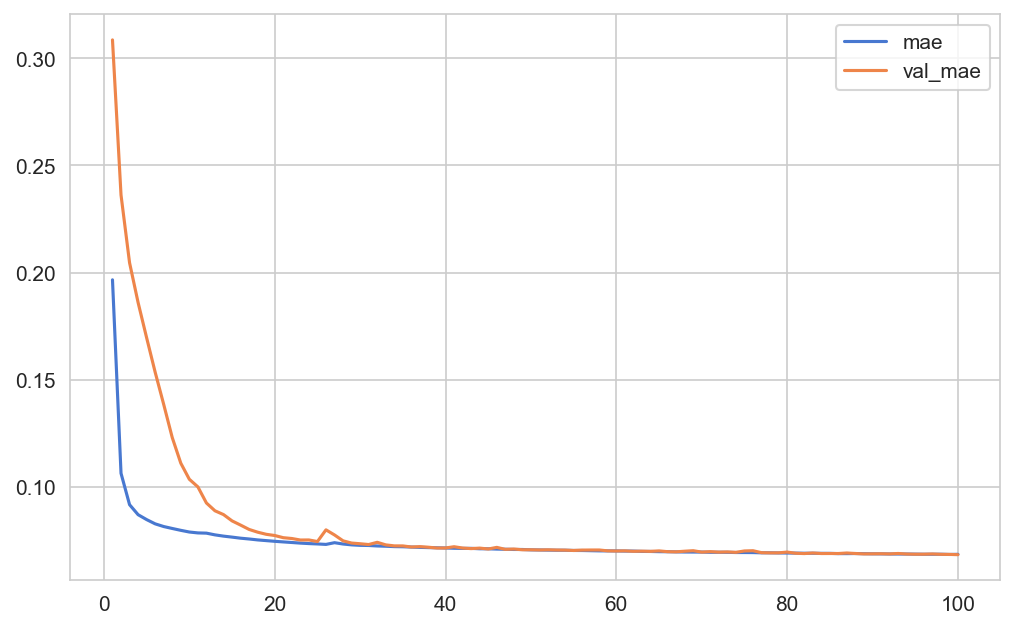

In [13]:
epoch = np.arange(1, len(history.history['mae'])+1)

create_fig()
sns.lineplot(epoch, history.history['mae'], label='mae')
sns.lineplot(epoch, history.history['val_mae'], label='val_mae')

In [14]:
model.evaluate(X_test, y_test)

107345/107345 [==============================] - 2s 17us/step


[0.06830403095795698, 0.06830406934022903]

In [15]:
predict = model.predict(X_test).flatten()

Text(0, 0.5, 'actual winPlacePerc')

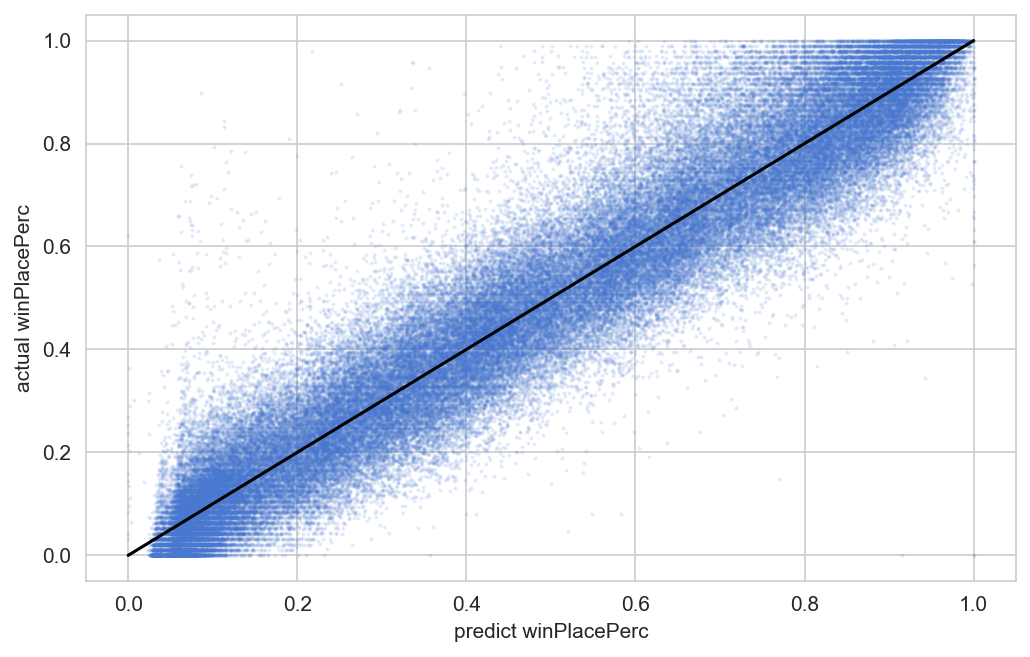

In [16]:
create_fig()
plt.plot(predict, y_test,  'o', alpha=0.1, markersize=1)
sns.lineplot([0, 1], [0, 1], color='k')
plt.xlabel('predict winPlacePerc')
plt.ylabel('actual winPlacePerc')